Mosquitos data : 

Desmond H. Foley, Leopoldo M. Rueda, Richard C. Wilkerson, Insight into Global Mosquito Biogeography from Country Species Records, Journal of Medical Entomology, Volume 44, Issue 4, 1 July 2007, Pages 554–567, https://doi.org/10.1093/jmedent/44.4.554 

Temperature data : Average yearly temperature is calculated by averaging the minimum and maximum daily temperatures in the country, averaged for the years 1991 – 2020
 https://climateknowledgeportal.worldbank.org/

Precipitation data : Total precipitation (depth in mm) in 2020 
https://data.worldbank.org/indicator/AG.LND.PRCP.MM?end=2020&most_recent_value_desc=true&start=2020&view=bar&year=2020

Area data : Total area (km^2) in 2021 
https://data.worldbank.org/indicator/AG.SRF.TOTL.K2?end=2021&start=1961


The number of mosquito species known from an area is a result of the intrinsic species richness, determined largely by environment and history, and sampling effort.

Correcting species number for geographic area is necessary to compare countries of different sizes for relative mosquito species density. Species number does not vary linearly with area and the exponential, power and logistic functions have been proposed to describe this mathematical relationship (Scheiner 2003). Consensus favors the power function as the best fit (Scheiner 2003), and this relationship is linear for log-log representations. Mosquito SAR have not been reported to our knowledge.

### Importer les données à partir des fichiers csv

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df_mous = pd.read_csv('mosquito_data.csv')
df_pluie = pd.read_csv('precipitation_data.csv')
df_temp = pd.read_csv('temperature_data.csv')
df_area = pd.read_csv('area_data.csv')

# Let's see the first few rows of the data
print(df_mous.head())
print(df_pluie.head())
print(df_temp.head())
print(df_area.head())



         Country  MosquitoPopulationTotalSpecies  \
0          India                           338.0   
1          China                           238.0   
2  United States                           175.0   
3      Indonesia                           439.0   
4       Pakistan                            89.0   

   MosquitoPopulationEndemicSpecies  MosquitoPopulationTotalSpeciesType  
0                              53.0                               271.0  
1                              85.0                               128.0  
2                              31.0                               186.0  
3                             108.0                               201.0  
4                               3.0                                16.0  
                 Country  Precipitation
0               Colombia           3240
1  São Tomé and Príncipe           3200
2                 Tuvalu           3200
3       Papua New Guinea           3142
4        Solomon Islands           3028
   

### Clean data

In [64]:

# Vérification des valeurs manquantes et des doublons
print(" Missing values in df_mous: ", df_mous.isnull().sum())
print(" Missing values in df_pluie: ", df_pluie.isnull().sum())
print(" Missing values in df_temp: ", df_temp.isnull().sum())
print(" Missing values in df_area: ", df_area.isnull().sum())

#check data types
print(df_mous.dtypes)
print(df_pluie.dtypes)
print(df_temp.dtypes)
print(df_area.dtypes)

#convert Precipitation and Temperature to float
df_pluie['Precipitation'] = df_pluie['Precipitation'].astype(float)
df_temp['Temperature'] = df_temp['Temperature'].astype(float)

print(df_pluie.dtypes)
print(df_temp.dtypes)


 Missing values in df_mous:  Country                                0
MosquitoPopulationTotalSpecies         2
MosquitoPopulationEndemicSpecies      81
MosquitoPopulationTotalSpeciesType    33
dtype: int64
 Missing values in df_pluie:  Country          0
Precipitation    0
dtype: int64
 Missing values in df_temp:  Country        0
Temperature    0
dtype: int64
 Missing values in df_area:  Country    0
Area       2
dtype: int64
Country                                object
MosquitoPopulationTotalSpecies        float64
MosquitoPopulationEndemicSpecies      float64
MosquitoPopulationTotalSpeciesType    float64
dtype: object
Country           object
Precipitation    float64
dtype: object
Country         object
Temperature    float64
dtype: object
Country     object
Area       float64
dtype: object
Country           object
Precipitation    float64
dtype: object
Country         object
Temperature    float64
dtype: object


In [65]:

# Supprimer les lignes contenant des NaN dans chaque DataFrame
df_mous_clean = df_mous.dropna()
df_pluie_clean = df_pluie.dropna()
df_temp_clean = df_temp.dropna()
df_area_clean = df_area.dropna()

# Fusionner les DataFrames nettoyés sur la colonne 'Country', en ne gardant que les pays communs
df_combined_clean = pd.merge(df_mous_clean, df_pluie_clean, on='Country', how='inner')
df_combined_clean = pd.merge(df_combined_clean, df_temp_clean, on='Country', how='inner')
df_combined_clean = pd.merge(df_combined_clean, df_area_clean, on='Country', how='inner')

# Afficher les premières lignes du DataFrame nettoyé et fusionné
print(df_combined_clean.head())


# print the number of countries in the final dataset
print("Number of countries in the final dataset: ", df_combined_clean['Country'].nunique())


#describe the final dataset
print(df_combined_clean.describe())


         Country  MosquitoPopulationTotalSpecies  \
0          India                           338.0   
1          China                           238.0   
2  United States                           175.0   
3      Indonesia                           439.0   
4       Pakistan                            89.0   

   MosquitoPopulationEndemicSpecies  MosquitoPopulationTotalSpeciesType  \
0                              53.0                               271.0   
1                              85.0                               128.0   
2                              31.0                               186.0   
3                             108.0                               201.0   
4                               3.0                                16.0   

   Precipitation  Temperature        Area  
0         1083.0        24.94  3287260.00  
1          645.0         7.59  9562910.00  
2          715.0         9.46  9831510.00  
3         2702.0        25.96  1916906.77  
4          494.0

## Plot data

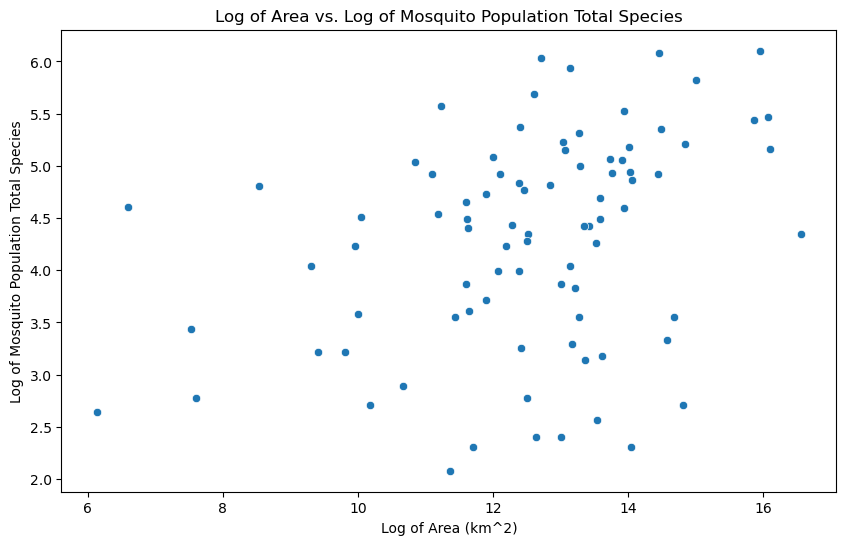

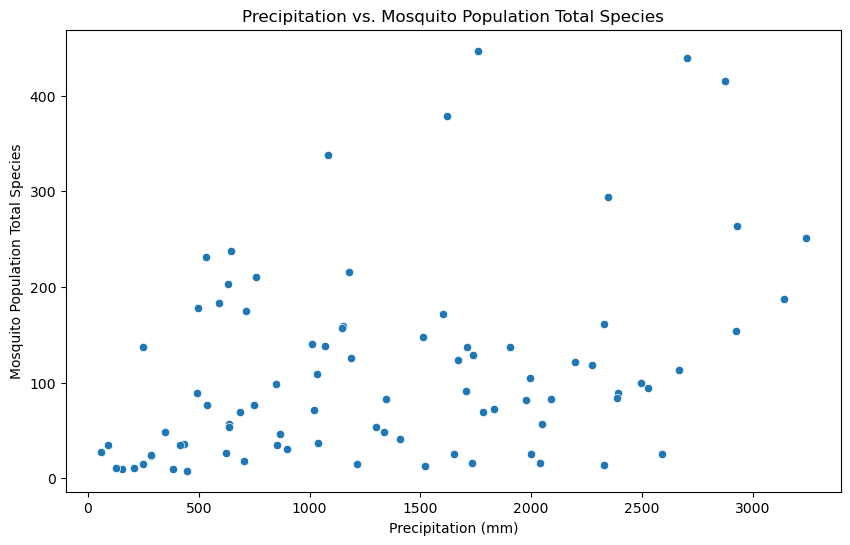

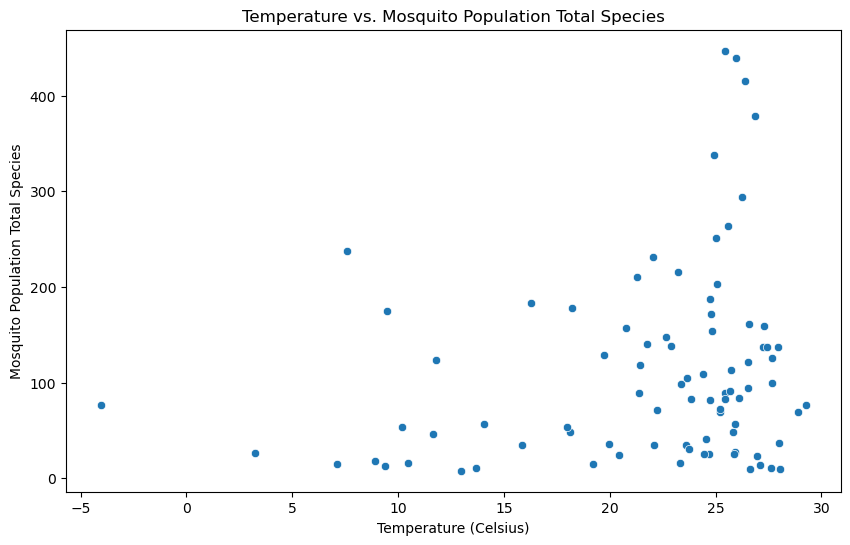

In [67]:
# plot log of area vs. log of mosquito population total species
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.log(df_combined_clean['Area']), y=np.log(df_combined_clean['MosquitoPopulationTotalSpecies']))
plt.xlabel('Log of Area (km^2)')
plt.ylabel('Log of Mosquito Population Total Species')
plt.title('Log of Area vs. Log of Mosquito Population Total Species')
plt.show()

# plot precipitation vs. mosquito population total species
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_combined_clean['Precipitation'], y=df_combined_clean['MosquitoPopulationTotalSpecies'])
plt.xlabel('Precipitation (mm)')
plt.ylabel('Mosquito Population Total Species')
plt.title('Precipitation vs. Mosquito Population Total Species')
plt.show()


#plot temperature vs. mosquito population total species
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_combined_clean['Temperature'], y=df_combined_clean['MosquitoPopulationTotalSpecies'])
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Mosquito Population Total Species')
plt.title('Temperature vs. Mosquito Population Total Species')
plt.show()



## Statistiques

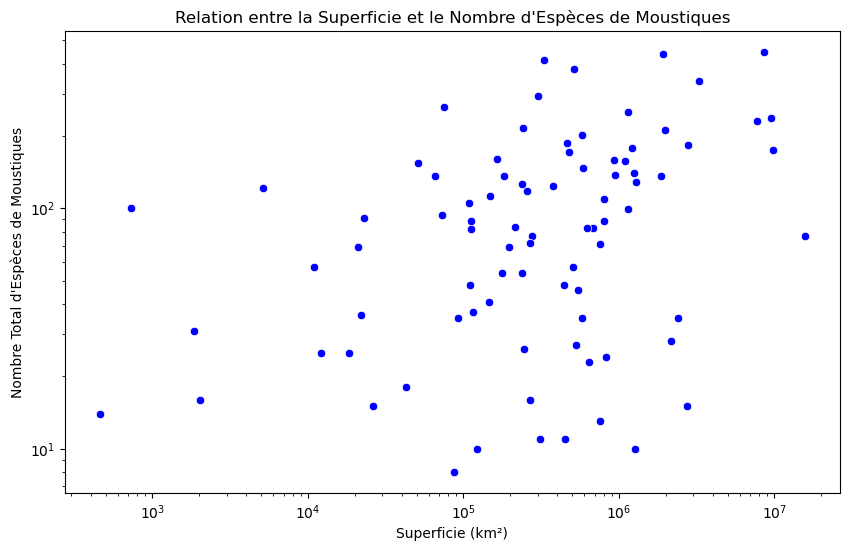

Coefficient de Corrélation : 0.30


In [71]:


# Créer un graphique de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined_clean, x='Area', y='MosquitoPopulationTotalSpecies', color='blue')
plt.xlabel('Superficie (km²)')
plt.ylabel('Nombre Total d\'Espèces de Moustiques')
plt.title('Relation entre la Superficie et le Nombre d\'Espèces de Moustiques')
plt.xscale('log')  # Pour améliorer la visualisation si les valeurs varient beaucoup
plt.yscale('log')  # Idem
plt.show()

#correlation
correlation = df_combined_clean[['Area', 'MosquitoPopulationTotalSpecies']].corr().iloc[0, 1]
print(f"Coefficient de Corrélation : {correlation:.2f}")


(85, 1)
(85, 1)


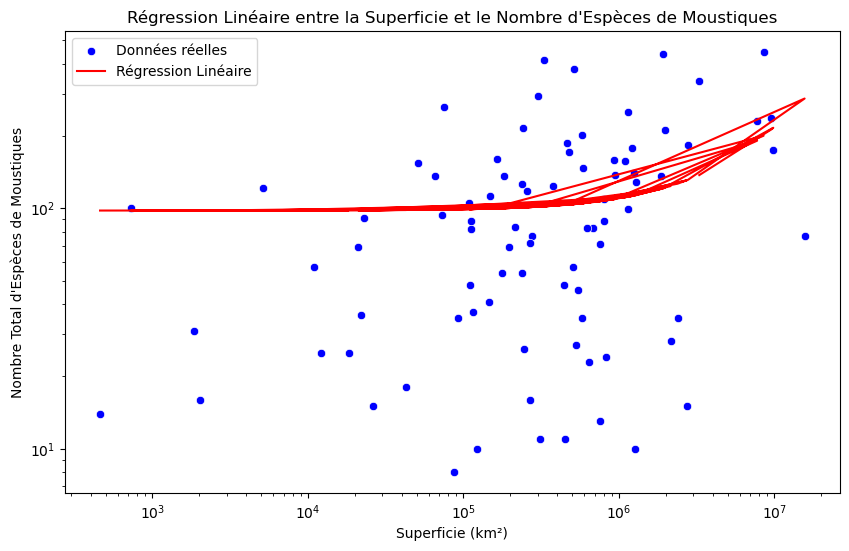

In [77]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Préparer les données
X = df_combined_clean[['Area']].values.reshape(-1, 1)

y = df_combined_clean['MosquitoPopulationTotalSpecies'].values.reshape(-1, 1)

print(X.shape)
print(y.shape)
# Création et ajustement du modèle
model = LinearRegression()
model.fit(X, y)

# Prédictions
y_pred = model.predict(X)

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined_clean, x='Area', y='MosquitoPopulationTotalSpecies', color='blue', label='Données réelles')
plt.plot(df_combined_clean['Area'], y_pred, color='red', label='Régression Linéaire')
plt.xlabel('Superficie (km²)')
plt.ylabel('Nombre Total d\'Espèces de Moustiques')
plt.title('Régression Linéaire entre la Superficie et le Nombre d\'Espèces de Moustiques')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
